# Waterloo University Course Lists

In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt
import numpy as np
## For Preparing Features to Model
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [220]:
url="https://uwaterloo.ca/graduate-studies-academic-calendar/mathematics/data-science-and-artificial-intelligence/master-data-science-and-artificial-intelligence-mdsai-co-operative-program-direct-entry#coursework"
resp = requests.get(url)
soup = BeautifulSoup(resp.content)

In [221]:
t=[]

for text in soup.find_all(name="div", attrs={"class":"field-content field-item"}):
  for li in text.find_all(name="li"):  
    t.append(li.text)
  

In [222]:
t

['\nStudents must complete at least 9 courses: normally 1 foundation course, 5 core courses, and 3 elective courses.\n',
 '\nFoundation courses\n\nStudents are expected to take at most 1 of the following 2 foundational courses depending on their undergraduate major:\n\nCS 600 Fundamentals of Computer Science for Data Science (designed for non-CS major background students)\n\n\nSTAT 845 Statistical Concepts for Data Science (designed for non-STAT major background students)\n\n\n',
 '\nStudents are expected to take at most 1 of the following 2 foundational courses depending on their undergraduate major:\n\nCS 600 Fundamentals of Computer Science for Data Science (designed for non-CS major background students)\n\n\nSTAT 845 Statistical Concepts for Data Science (designed for non-STAT major background students)\n\n',
 '\nCS 600 Fundamentals of Computer Science for Data Science (designed for non-CS major background students)\n',
 '\nSTAT 845 Statistical Concepts for Data Science (designed f

In [223]:
Waterloo= pd.DataFrame(t, columns=["Course List"])
Waterloo

,Course List
0,\nStudents must complete at least 9 courses: n...
1,\nFoundation courses\n\nStudents are expected ...
2,\nStudents are expected to take at most 1 of t...
3,\nCS 600 Fundamentals of Computer Science for ...
4,\nSTAT 845 Statistical Concepts for Data Scien...
5,\nCore courses\n\nStudents are required to tak...
6,\nStudents are required to take the following ...
7,\nSTAT 847 Exploratory Data Analysis\n
8,\n1 of:\n\nCS 651 Data-Intensive Distributed C...
9,\nCS 651 Data-Intensive Distributed Computing ...


In [224]:
#Manually dropping the unnecessary text rows
Waterloo=Waterloo.drop([0,1,2,5,6,24,25,51,52,53])
Waterloo

,Course List
3,\nCS 600 Fundamentals of Computer Science for ...
4,\nSTAT 845 Statistical Concepts for Data Scien...
7,\nSTAT 847 Exploratory Data Analysis\n
8,\n1 of:\n\nCS 651 Data-Intensive Distributed C...
9,\nCS 651 Data-Intensive Distributed Computing ...
10,\nCS 631 Data-Intensive Distributed Analytics ...
11,\n1 of:\n\nSTAT 841 Statistical Learning - Cla...
12,\nSTAT 841 Statistical Learning - Classificati...
13,\nSTAT 842 Data Visualization\n
14,\nSTAT 844 Statistical Learning - Function Est...


In [225]:
def remove_stop_words_and_tokenize(tweet):

    
    s1 = ' '
    tokenizer = RegexpTokenizer(r'\w+')         
    tokenised_tweet = tokenizer.tokenize(tweet)
    stopword = nltk.corpus.stopwords.words('english')
    stopword.extend(['Data Science',"Data","Science","Project","\n","CO","STAT","CA","CS","-"])
    #stopword.extend(given_stop_words)
    stopword = list(set(stopword))    
        
    words_rmStop = [word for word in tokenised_tweet if word not in stopword] # remove stop words
#     tweet_no_stop_words = s1.join(words_rmStop)
    
    return words_rmStop

In [226]:
def remove_punctuation(tweet):

        
    
    tweet = re.sub('[0-9]+', '', tweet) #replacing all numbers by a ''
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r'_[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r'&[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r'http[A-Za-z0-9]+','',tweet)
    tweet= re.sub(r'-','',tweet)
    return tweet

In [227]:
Waterloo['without_punctuation']= Waterloo['Course List'].apply(lambda x: remove_punctuation(x))
Waterloo

,Course List,without_punctuation
3,\nCS 600 Fundamentals of Computer Science for ...,\nCS Fundamentals of Computer Science for Dat...
4,\nSTAT 845 Statistical Concepts for Data Scien...,\nSTAT Statistical Concepts for Data Science ...
7,\nSTAT 847 Exploratory Data Analysis\n,\nSTAT Exploratory Data Analysis\n
8,\n1 of:\n\nCS 651 Data-Intensive Distributed C...,\n of:\n\nCS DataIntensive Distributed Comput...
9,\nCS 651 Data-Intensive Distributed Computing ...,\nCS DataIntensive Distributed Computing (des...
10,\nCS 631 Data-Intensive Distributed Analytics ...,\nCS DataIntensive Distributed Analytics (des...
11,\n1 of:\n\nSTAT 841 Statistical Learning - Cla...,\n of:\n\nSTAT Statistical Learning Classifi...
12,\nSTAT 841 Statistical Learning - Classificati...,\nSTAT Statistical Learning Classification\n
13,\nSTAT 842 Data Visualization\n,\nSTAT Data Visualization\n
14,\nSTAT 844 Statistical Learning - Function Est...,\nSTAT Statistical Learning Function Estimat...


In [228]:
tokenizer = RegexpTokenizer(r'\w+') 
Waterloo['tokenized_tweet']= Waterloo['without_punctuation'].apply(lambda x: remove_stop_words_and_tokenize(x) )
#T['tokenized_tweet']
Waterloo

,Course List,without_punctuation,tokenized_tweet
3,\nCS 600 Fundamentals of Computer Science for ...,\nCS Fundamentals of Computer Science for Dat...,"[Fundamentals, Computer, designed, nonCS, majo..."
4,\nSTAT 845 Statistical Concepts for Data Scien...,\nSTAT Statistical Concepts for Data Science ...,"[Statistical, Concepts, designed, nonSTAT, maj..."
7,\nSTAT 847 Exploratory Data Analysis\n,\nSTAT Exploratory Data Analysis\n,"[Exploratory, Analysis]"
8,\n1 of:\n\nCS 651 Data-Intensive Distributed C...,\n of:\n\nCS DataIntensive Distributed Comput...,"[DataIntensive, Distributed, Computing, design..."
9,\nCS 651 Data-Intensive Distributed Computing ...,\nCS DataIntensive Distributed Computing (des...,"[DataIntensive, Distributed, Computing, design..."
10,\nCS 631 Data-Intensive Distributed Analytics ...,\nCS DataIntensive Distributed Analytics (des...,"[DataIntensive, Distributed, Analytics, design..."
11,\n1 of:\n\nSTAT 841 Statistical Learning - Cla...,\n of:\n\nSTAT Statistical Learning Classifi...,"[Statistical, Learning, Classification, Visual..."
12,\nSTAT 841 Statistical Learning - Classificati...,\nSTAT Statistical Learning Classification\n,"[Statistical, Learning, Classification]"
13,\nSTAT 842 Data Visualization\n,\nSTAT Data Visualization\n,[Visualization]
14,\nSTAT 844 Statistical Learning - Function Est...,\nSTAT Statistical Learning Function Estimat...,"[Statistical, Learning, Function, Estimation]"


In [229]:
#Detokenize the lists
def detokenize(tokenised_tweet):
   
    s1 = ' '
    tweet_detokenised = s1.join(tokenised_tweet)
    
    return tweet_detokenised

In [230]:
Waterloo['detokenize']=Waterloo['tokenized_tweet'].apply(lambda x: detokenize(x))
Waterloo

,Course List,without_punctuation,tokenized_tweet,detokenize
3,\nCS 600 Fundamentals of Computer Science for ...,\nCS Fundamentals of Computer Science for Dat...,"[Fundamentals, Computer, designed, nonCS, majo...",Fundamentals Computer designed nonCS major bac...
4,\nSTAT 845 Statistical Concepts for Data Scien...,\nSTAT Statistical Concepts for Data Science ...,"[Statistical, Concepts, designed, nonSTAT, maj...",Statistical Concepts designed nonSTAT major ba...
7,\nSTAT 847 Exploratory Data Analysis\n,\nSTAT Exploratory Data Analysis\n,"[Exploratory, Analysis]",Exploratory Analysis
8,\n1 of:\n\nCS 651 Data-Intensive Distributed C...,\n of:\n\nCS DataIntensive Distributed Comput...,"[DataIntensive, Distributed, Computing, design...",DataIntensive Distributed Computing designed m...
9,\nCS 651 Data-Intensive Distributed Computing ...,\nCS DataIntensive Distributed Computing (des...,"[DataIntensive, Distributed, Computing, design...",DataIntensive Distributed Computing designed m...
10,\nCS 631 Data-Intensive Distributed Analytics ...,\nCS DataIntensive Distributed Analytics (des...,"[DataIntensive, Distributed, Analytics, design...",DataIntensive Distributed Analytics designed n...
11,\n1 of:\n\nSTAT 841 Statistical Learning - Cla...,\n of:\n\nSTAT Statistical Learning Classifi...,"[Statistical, Learning, Classification, Visual...",Statistical Learning Classification Visualizat...
12,\nSTAT 841 Statistical Learning - Classificati...,\nSTAT Statistical Learning Classification\n,"[Statistical, Learning, Classification]",Statistical Learning Classification
13,\nSTAT 842 Data Visualization\n,\nSTAT Data Visualization\n,[Visualization],Visualization
14,\nSTAT 844 Statistical Learning - Function Est...,\nSTAT Statistical Learning Function Estimat...,"[Statistical, Learning, Function, Estimation]",Statistical Learning Function Estimation


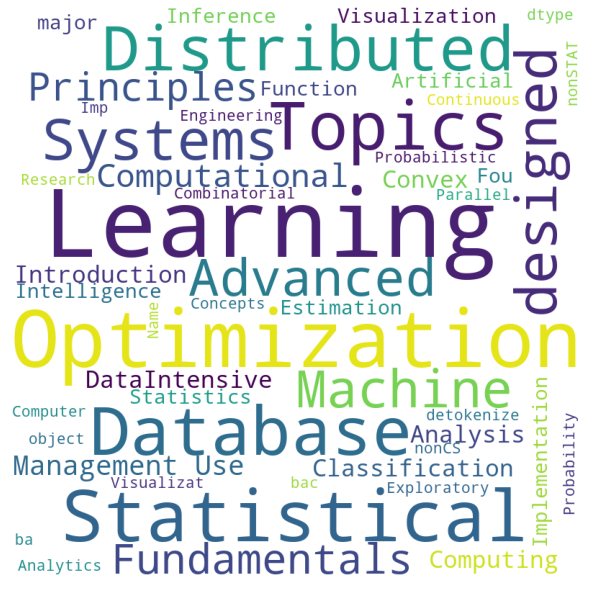

In [231]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(Waterloo['detokenize']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [232]:
Waterloo['detokenize'].unique()
#T.detokenize.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
#T['tokenized_tweet'].value_counts()
pd.Series(' '.join(Waterloo.detokenize).split()).value_counts()[:10] #getting a list of top 10 High frequency words

Learning        13
Optimization    11
Statistical     10
Distributed      7
Machine          7
Topics           7
background       6
major            6
Database         6
designed         6
dtype: int64

# Carnegie Mellon University Course Lists

In [233]:
url = 'https://mcds.cs.cmu.edu/learn-us-curriculum'
resp1 = requests.get(url)
soup = BeautifulSoup(resp1.content)
p=[]

for text in soup.find_all(name="div", attrs={"class":"field field-name-body field-type-text-with-summary field-label-hidden"}):
  for li in text.find_all(name="li"):  
    p.append(li.text)
  
p

['15-619 Cloud Computing',
 '10-601 Machine Learning',
 '05-839 Interactive Data Science',
 '11-631 Data Science Seminar',
 '15-605 Operating Systems Implementation',
 '15-618 Parallel Computer Architecture & Programming',
 '15-640 Distributed Systems',
 '15-641 Computer Networks',
 '15-645 Database Systems',
 '15-712 Advanced and Distributed Operating Systems',
 '15-719 Advanced Cloud Computing',
 '15-721 Advanced Databases',
 '15-746 Advanced Storage Systems',
 '15-821 Mobile and Pervasive Computing',
 '36-702 Statistical Machine Learning',
 '36-705 Intermediate Statistics',
 '36-725 Convex Optimization',
 '10-608 Conversational Machine Learning',
 '10-701 Introduction to Machine Learning (PhD)',
 '10-703 Deep Reinforcement Learning & Control',
 '10-708 Probabilistic Graphical Models',
 '10-715 Advanced Intro to Machine Learning',
 '10-725 Convex Optimization',
 '10-805 Machine Learning with Big Data Sets',
 '11-641 Machine Learning for Text Mining',
 '11-661 Language and Statistics'

In [234]:
carn_mellon= pd.DataFrame(p, columns=['Course list'])
carn_mellon

,Course list
0,15-619 Cloud Computing
1,10-601 Machine Learning
2,05-839 Interactive Data Science
3,11-631 Data Science Seminar
4,15-605 Operating Systems Implementation
5,15-618 Parallel Computer Architecture & Progra...
6,15-640 Distributed Systems
7,15-641 Computer Networks
8,15-645 Database Systems
9,15-712 Advanced and Distributed Operating Systems


In [235]:
carn_mellon['without_punctuations']= carn_mellon['Course list'].apply(lambda x: remove_punctuation(x))
carn_mellon['tokenized_words']=carn_mellon['without_punctuations'].apply(lambda x: remove_stop_words_and_tokenize(x))
carn_mellon['detokenize']=carn_mellon['tokenized_words'].apply(lambda x: detokenize(x))
carn_mellon

,Course list,without_punctuations,tokenized_words,detokenize
0,15-619 Cloud Computing,Cloud Computing,"[Cloud, Computing]",Cloud Computing
1,10-601 Machine Learning,Machine Learning,"[Machine, Learning]",Machine Learning
2,05-839 Interactive Data Science,Interactive Data Science,[Interactive],Interactive
3,11-631 Data Science Seminar,Data Science Seminar,[Seminar],Seminar
4,15-605 Operating Systems Implementation,Operating Systems Implementation,"[Operating, Systems, Implementation]",Operating Systems Implementation
5,15-618 Parallel Computer Architecture & Progra...,Parallel Computer Architecture & Programming,"[Parallel, Computer, Architecture, Programming]",Parallel Computer Architecture Programming
6,15-640 Distributed Systems,Distributed Systems,"[Distributed, Systems]",Distributed Systems
7,15-641 Computer Networks,Computer Networks,"[Computer, Networks]",Computer Networks
8,15-645 Database Systems,Database Systems,"[Database, Systems]",Database Systems
9,15-712 Advanced and Distributed Operating Systems,Advanced and Distributed Operating Systems,"[Advanced, Distributed, Operating, Systems]",Advanced Distributed Operating Systems


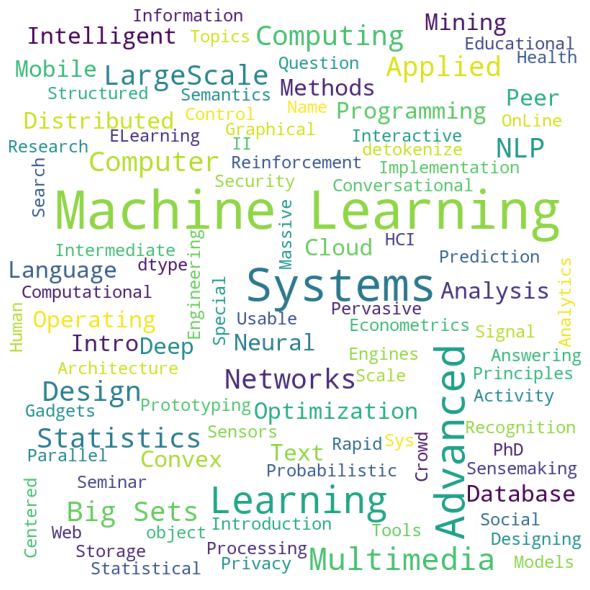

In [236]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(carn_mellon['detokenize']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [237]:
carn_mellon['detokenize'].unique()
#T.detokenize.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
#T['tokenized_tweet'].value_counts()
pd.Series(' '.join(carn_mellon.detokenize).split()).value_counts()[:10] #getting a list of top 10 High frequency words

Learning      19
Machine       13
Systems       10
Advanced       7
Multimedia     4
Statistics     3
Applied        3
LargeScale     3
Computer       3
Computing      3
dtype: int64

# University Of Melbourne Course Lists

In [8]:
url = 'https://study.unimelb.edu.au/find/courses/graduate/master-of-data-science/what-will-i-study/'
resp3 = requests.get(url)
soup = BeautifulSoup(resp3.content)

In [9]:
program_title=[] 


for div in soup.find_all(name="div", attrs={"class":"subject-programs__group-panel"}):
    for span in div.find_all(name="span", attrs={"class":"subject-programs__title"}):
        program_title.append(span.text)
program_title

['Methods of Mathematical Statistics',
 'A First Course In Statistical Learning',
 'Programming and Software Development',
 'Algorithms and Complexity',
 'Elements of Data Processing',
 'Database Systems & Information Modelling',
 'Statistical Modelling for Data Science',
 'Multivariate Statistics for Data Science',
 'Computational Statistics & Data Science',
 'Cluster and Cloud Computing',
 'Statistical Machine Learning',
 'Advanced Database Systems',
 'Data Science Project Pt1',
 'Data Science Project Pt2',
 'Foundations of Spatial Information',
 'Spatial Databases',
 'Spatial Analysis',
 'Information Visualisation',
 'Analysis of High-Dimensional Data',
 'Advanced Statistical Modelling',
 'Mathematics of Risk',
 'Optimisation for Industry',
 'Practice of Statistics & Data Science',
 'Stochastic Calculus with Applications',
 'Advanced Probability',
 'Random Processes',
 'AI Planning for Autonomy',
 'Advanced Theoretical Computer Science',
 'Algorithms for Bioinformatics',
 'Computati

In [239]:
Melbourne= pd.DataFrame(program_title, columns=['Course List'])
Melbourne

,Course List
0,Methods of Mathematical Statistics
1,A First Course In Statistical Learning
2,Programming and Software Development
3,Algorithms and Complexity
4,Elements of Data Processing
5,Database Systems & Information Modelling
6,Statistical Modelling for Data Science
7,Multivariate Statistics for Data Science
8,Computational Statistics & Data Science
9,Cluster and Cloud Computing


In [241]:
tokenizer = RegexpTokenizer(r'\w+') 
Melbourne['tokenized_tweet']= Melbourne['Course List'].apply(lambda x: remove_stop_words_and_tokenize(x) )
#T['tokenized_tweet']
Melbourne

,Course List,tokenized_tweet
0,Methods of Mathematical Statistics,"[Methods, Mathematical, Statistics]"
1,A First Course In Statistical Learning,"[A, First, Course, In, Statistical, Learning]"
2,Programming and Software Development,"[Programming, Software, Development]"
3,Algorithms and Complexity,"[Algorithms, Complexity]"
4,Elements of Data Processing,"[Elements, Processing]"
5,Database Systems & Information Modelling,"[Database, Systems, Information, Modelling]"
6,Statistical Modelling for Data Science,"[Statistical, Modelling]"
7,Multivariate Statistics for Data Science,"[Multivariate, Statistics]"
8,Computational Statistics & Data Science,"[Computational, Statistics]"
9,Cluster and Cloud Computing,"[Cluster, Cloud, Computing]"


In [242]:
Melbourne['detokenize']=Melbourne['tokenized_tweet'].apply(lambda x: detokenize(x))

In [243]:
Melbourne

,Course List,tokenized_tweet,detokenize
0,Methods of Mathematical Statistics,"[Methods, Mathematical, Statistics]",Methods Mathematical Statistics
1,A First Course In Statistical Learning,"[A, First, Course, In, Statistical, Learning]",A First Course In Statistical Learning
2,Programming and Software Development,"[Programming, Software, Development]",Programming Software Development
3,Algorithms and Complexity,"[Algorithms, Complexity]",Algorithms Complexity
4,Elements of Data Processing,"[Elements, Processing]",Elements Processing
5,Database Systems & Information Modelling,"[Database, Systems, Information, Modelling]",Database Systems Information Modelling
6,Statistical Modelling for Data Science,"[Statistical, Modelling]",Statistical Modelling
7,Multivariate Statistics for Data Science,"[Multivariate, Statistics]",Multivariate Statistics
8,Computational Statistics & Data Science,"[Computational, Statistics]",Computational Statistics
9,Cluster and Cloud Computing,"[Cluster, Cloud, Computing]",Cluster Cloud Computing


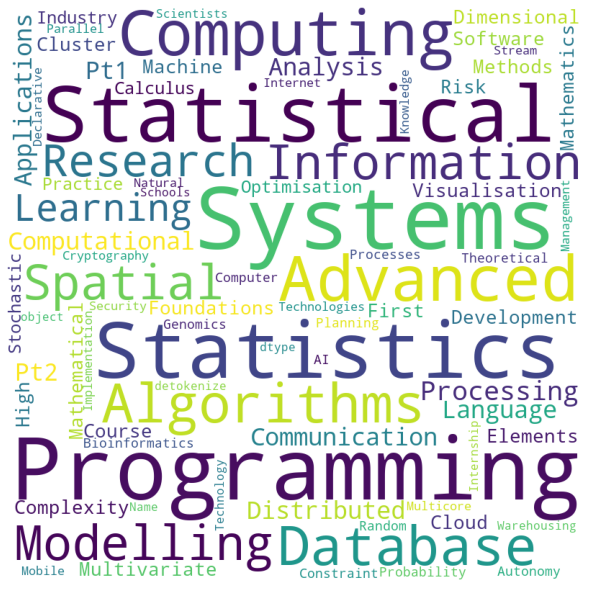

In [244]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(Melbourne['detokenize']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [245]:
Melbourne['detokenize'].unique()
#T.detokenize.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
#T['tokenized_tweet'].value_counts()
pd.Series(' '.join(Melbourne.detokenize).split()).value_counts()[:10]


Systems        5
Programming    5
Advanced       4
Statistics     4
Statistical    4
Computing      4
Modelling      3
Spatial        3
Research       3
Information    3
dtype: int64

#University of pennsylvania Course Lists


In [7]:
url = 'https://catalog.upenn.edu/graduate/programs/data-science-mse/'
resp2 = requests.get(url)
soup = BeautifulSoup(resp2.content)
program=[]


#couln't find the appropriate attribute to extract the course list. please trying inspecting the above list.

  
program

[]

In [ ]:
e

In [32]:
url='https://statistics.stanford.edu/academic-programs/graduate-programs/ms-data-science-2020-21/data-science-track-2019-20'
resp3= requests.get(url)
soup= BeautifulSoup(resp3.content)
program=[]
course_des= []

for text in soup.find_all(name="div", attrs={"class":"field-item even"}):
  for td in text.find_all(name="td"): 


    program.append(td.text)

#for text in soup.find_all(name= 'div', attrs={"class":"searchresult.result-courseresult"}):

  
    #course_des.append(text)

program

['STATS\xa0200',
 'Introduction to Statistical Inference',
 '3',
 'Aut, Win',
 'STATS\xa0203',
 'Introduction to Regression Models and Analysis of Variance',
 '3',
 'Win',
 'or STATS\xa0305A',
 'Applied Statistics I',
 '3',
 'Aut',
 'STATS\xa0315A',
 'Modern Applied Statistics: Learning',
 '3',
 'Win',
 'CME\xa0302',
 'Numerical Linear Algebra',
 '3',
 'Aut',
 'CME\xa0308',
 'Stochastic Methods in Engineering',
 '3',
 'Spr',
 'Scientific Computing: (3 units)',
 '\xa0',
 '\xa0',
 'CME\xa0212',
 'Advanced Software Development for Scientists and Engineers (prerequisite: CME\xa0211 )',
 '3',
 'Win',
 'Large-Scale Computing: (3 units)',
 '\xa0',
 '\xa0',
 'CME\xa0213',
 'Introduction to parallel computing using MPI, openMP, and CUDA',
 '3',
 'Win',
 'CME\xa0323',
 'Distributed Algorithms and Optimization',
 '3',
 'Spr',
 'CS\xa0246',
 'Mining Massive Data Sets',
 '3-4',
 'Win',
 'STATS\xa0204',
 'Sampling',
 '3',
 'Spr',
 'STATS\xa0266',
 'Advanced Statistical Methods for Observational Stud

In [44]:
course_des=[]
course_des=soup.find(name="div", attrs={"class":"searchresult.search-courseresult"})


#p = soup.find(name="p", attrs={"class":"course__description"})
#text = "".join(p.text)



course_des

AttributeError: ignored

In [58]:
stanford=[]
courses=[]
p=[]
li=[]
des=[]
for div in soup.find_all(name="div", attrs={"class":"searchresult.search-courseresult"}):
     for p in div.find_all(name="p"):
         p.append(p.text)
     for li in div.find_all(name='li'):
         p.append(li.text)
     p.append(li)
     des.append(p)
stanford.append(courses)        
df_melbourne = pd.DataFrame(stanford)